### Solar System Live
#### Plot planets around Sun
Watch where planets are around Sun
#### Get Geocentric positions
The Sun, the planets, the nano planets, our Moon and 1 Centaur


In [1]:
import matplotlib.pyplot as plt
# import math
import datetime
import solarsystem
# import planetview
# from libraries.planetview import solarsystem

#### No need to edit any variable to watch Solar System Live
* Editing date elements below can output positions for the given time
* Edit date elements below if you wish to see where planets will be or where they have been

In [2]:
now    = datetime.datetime.utcnow()
now    = datetime.datetime.now(datetime.timezone.utc)
year   = now.year
month  = now.month
day    = now.day
hour   = now.hour
minute = now.minute
# As this is UTC time we set UT to 0
UT     = 0
# if (datetime.datetime.now(datetime.timezone.utc).dst())==None:
#     dst=0
# else:
#     dst=1
dst = 0

print(year, month, day, hour, minute, UT, dst)

2020 4 13 20 49 0 0


In [3]:
# planet position output be in horizontal coordinates (longitude, latitude, distance from sun in AU)
view='horizontal'

In [4]:
H = solarsystem.Heliocentric(year=year, month=month, day=day, hour=hour, minute=minute, 
                         UT=UT, dst=dst, view=view )

In [5]:
planets=H.planets()
distances=[]
print('Planet', '   \t','Longitude', '  \t','Latitude', '   \t','Distance')
print('-------------------------------------------------------------------')
for key in planets:
    distances.append(planets[key][2])
    elements = planets[key]
    print(key, '   \t',round(elements[0],2), '  \t',round(elements[1],2), '   \t',round(elements[2],2))
print()
print('Distance is in AU')

Planet    	 Longitude   	 Latitude    	 Distance
-------------------------------------------------------------------
Mercury    	 309.63   	 -6.92    	 0.42
Venus    	 171.94   	 3.38    	 0.72
Earth    	 204.39   	 0.0    	 1.0
Mars    	 268.27   	 -1.15    	 1.46
Jupiter    	 284.67   	 359.91    	 5.19
Saturn    	 295.65   	 359.92    	 10.04
Uranus    	 36.49   	 359.53    	 19.8
Neptune    	 348.65   	 -1.06    	 29.91
Pluto    	 293.27   	 359.17    	 33.94
Ceres    	 310.27   	 -8.12    	 2.97
Chiron    	 5.31   	 2.84    	 18.82
Eris    	 23.61   	 -11.69    	 95.98

Distance is in AU


In [6]:
Hr = solarsystem.Heliocentric(year=year, month=month, day=day, hour=hour, minute=minute, 
                         UT=UT, dst=dst, view='rectangular' )
planetspositionsHrect=Hr.planets()
# planetspositionsHrect

In [7]:
forplot=[]
planetname=[]
for key in planetspositionsHrect:
    planetname.append(key)
    forplot.append(   planetspositionsHrect[key] )

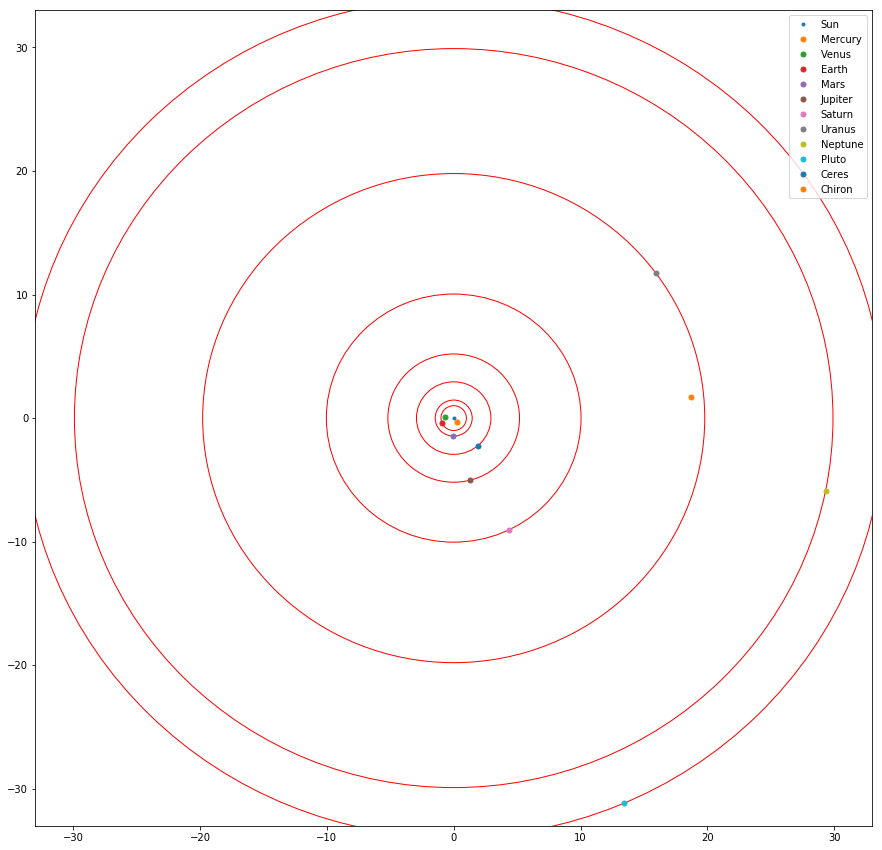

In [8]:
plt.figure(figsize=(15,15))
ax = plt.gca()
ax.cla() # clear things for fresh plot
# ax.set_xlim((-6, 6))
# ax.set_ylim((-6, 6))
ax.set_xlim((-33, 33))
ax.set_ylim((-33, 33))
a=0.5
ax.plot(0,0,'.', label='Sun') 
for i in range(11):
    ax.plot(forplot[i][0] , forplot[i][1] ,'.', markersize=10, label=planetname[i]) 
    if (i >1) & (i < 10):
        ax.add_artist(plt.Circle((0, 0), ((abs(forplot[i][0])**2+abs(forplot[i][1])**2)**0.5), color='r', fill=False))
ax.legend()
plt.show()

In [9]:
Geq = solarsystem.Geocentric(year=year, month=month, day=day, hour=hour, minute=minute, 
                         UT=UT, dst=dst, plane='equatorial')
Geqp=Geq.position()


print('Object','    \t','Right Ascension','\t','Declination','\t','Distace in AU')
print('-----------------------------------------------------------------------')
for i in Geqp:
    print(i,'    \t',solarsystem.demical2hms(Geqp[i][0]),'      \t',
          solarsystem.demical2arcs(Geqp[i][1]),'\t',round(Geqp[i][2],2))
    

Object     	 Right Ascension 	 Declination 	 Distace in AU
-----------------------------------------------------------------------
Sun     	 1h 30m 20s       	 9° 27.11' 	 1.0
Mercury     	 0h 19m 48s       	 0° 32.87' 	 1.19
Venus     	 4h 24m 13s       	 26° 3.58' 	 0.55
Mars     	 20h 50m 15s       	 -18° 59.54' 	 1.36
Jupiter     	 19h 51m 13s       	 -21° 4.32' 	 5.12
Saturn     	 20h 14m 21s       	 -19° 56.46' 	 10.11
Uranus     	 2h 15m 0s       	 13° 3.94' 	 20.78
Neptune     	 23h 23m 53s       	 -5° 0.48' 	 30.73
Pluto     	 19h 48m 14s       	 -21° 57.11' 	 33.94
Ceres     	 22h 7m 7s       	 -19° 11.67' 	 3.38
Chiron     	 0h 18m 41s       	 4° 57.76' 	 19.77
Eris     	 1h 44m 25s       	 -1° 35.89' 	 96.96


In [10]:
# Greenwich, England Coordinates
longtitude = 0
latitude   = 51.5

moon = solarsystem.Moon(year=year, month=month, day=day, hour=hour, minute=minute, 
                         UT=UT, dst=dst, longtitude=longtitude, latitude=latitude, topographic=True)
moon_position = moon.position()

In [11]:
moon_position

(281.93732542654186, -1.6492687643025625, 60.22806269440179)

In [12]:
moon_position_eq=solarsystem.spherical_ecliptic2equatorial(moon_position[0],moon_position[1],moon_position[2],H.oblecl)

In [13]:
moon_position_eq

(283.13770090759937, -24.54320712703892, 60.22806269440179)

In [14]:
print('Object','\t','Right Ascension','\t','Declination','\t','Distace in Earth Radius')
print('Moon','\t',solarsystem.demical2hms(moon_position_eq[0]),'     \t',
      solarsystem.demical2arcs(moon_position_eq[1]) ,'\t',moon_position_eq[2])

Object 	 Right Ascension 	 Declination 	 Distace in Earth Radius
Moon 	 18h 52m 33s      	 -24° 32.59' 	 60.22806269440179
